In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
metrocar = pd.read_csv(r"C:\Users\ashka\Downloads\metrocar_complete.csv", low_memory=False)
metrocar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396679 entries, 0 to 396678
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   app_download_key     396679 non-null  object 
 1   platform             396679 non-null  object 
 2   download_ts          396679 non-null  object 
 3   session_id           390694 non-null  object 
 4   user_id              390694 non-null  float64
 5   age_range            273395 non-null  object 
 6   signup_ts            390694 non-null  object 
 7   ride_id              385477 non-null  float64
 8   driver_id            248379 non-null  float64
 9   request_ts           385477 non-null  object 
 10  accept_ts            248379 non-null  object 
 11  pickup_location      385477 non-null  object 
 12  dropoff_location     385477 non-null  object 
 13  pickup_ts            223652 non-null  object 
 14  dropoff_ts           223652 non-null  object 
 15  cancel_ts        

In [3]:
avg_fare = metrocar['purchase_amount_usd'].mean()
avg_fare

19.996162878042675

In [4]:
metrocar.isna().sum()

app_download_key            0
platform                    0
download_ts                 0
session_id               5985
user_id                  5985
age_range              123284
signup_ts                5985
ride_id                 11202
driver_id              148300
request_ts              11202
accept_ts              148300
pickup_location         11202
dropoff_location        11202
pickup_ts              173027
dropoff_ts             173027
cancel_ts              234854
transaction_id         173027
purchase_amount_usd    173027
charge_status          173027
transaction_ts         173027
review_id              240468
rating                 240468
review                 240468
dtype: int64

In [5]:
metrocar.describe()

,user_id,ride_id,driver_id,transaction_id,purchase_amount_usd,review_id,rating
count,390694.000000,3.854770e+05,248379.000000,2.236520e+05,223652.000000,156211.000000,156211.000000
mean,108778.780647,3.192738e+06,108805.680263,1.011183e+07,19.996163,128105.000000,3.063299
std,5079.239978,1.112778e+05,5083.877638,6.456292e+04,5.776615,45094.375788,1.594305
min,100000.000000,3.000000e+06,100000.000000,1.000000e+07,10.000000,50000.000000,1.000000
25%,104406.000000,3.096369e+06,104405.000000,1.005591e+07,15.000000,89052.500000,1.000000
50%,108775.000000,3.192738e+06,108808.000000,1.011183e+07,19.990000,128105.000000,4.000000
75%,113169.000000,3.289107e+06,113205.500000,1.016774e+07,25.000000,167157.500000,5.000000
max,117622.000000,3.385476e+06,117622.000000,1.022365e+07,30.000000,206210.000000,5.000000


In [6]:
metrocar.duplicated().sum()

0

In [7]:
timestamp_columns = ['download_ts', 'signup_ts', 'request_ts', 'accept_ts', 'pickup_ts', 'dropoff_ts', 'cancel_ts', 'transaction_ts']
metrocar[timestamp_columns] = metrocar[timestamp_columns].apply(pd.to_datetime)
print(metrocar.dtypes)

app_download_key               object
platform                       object
download_ts            datetime64[ns]
session_id                     object
user_id                       float64
age_range                      object
signup_ts              datetime64[ns]
ride_id                       float64
driver_id                     float64
request_ts             datetime64[ns]
accept_ts              datetime64[ns]
pickup_location                object
dropoff_location               object
pickup_ts              datetime64[ns]
dropoff_ts             datetime64[ns]
cancel_ts              datetime64[ns]
transaction_id                float64
purchase_amount_usd           float64
charge_status                  object
transaction_ts         datetime64[ns]
review_id                     float64
rating                        float64
review                         object
dtype: object


In [8]:
df = metrocar.copy()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396679 entries, 0 to 396678
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   app_download_key     396679 non-null  object        
 1   platform             396679 non-null  object        
 2   download_ts          396679 non-null  datetime64[ns]
 3   session_id           390694 non-null  object        
 4   user_id              390694 non-null  float64       
 5   age_range            273395 non-null  object        
 6   signup_ts            390694 non-null  datetime64[ns]
 7   ride_id              385477 non-null  float64       
 8   driver_id            248379 non-null  float64       
 9   request_ts           385477 non-null  datetime64[ns]
 10  accept_ts            248379 non-null  datetime64[ns]
 11  pickup_location      385477 non-null  object        
 12  dropoff_location     385477 non-null  object        
 13  pickup_ts     

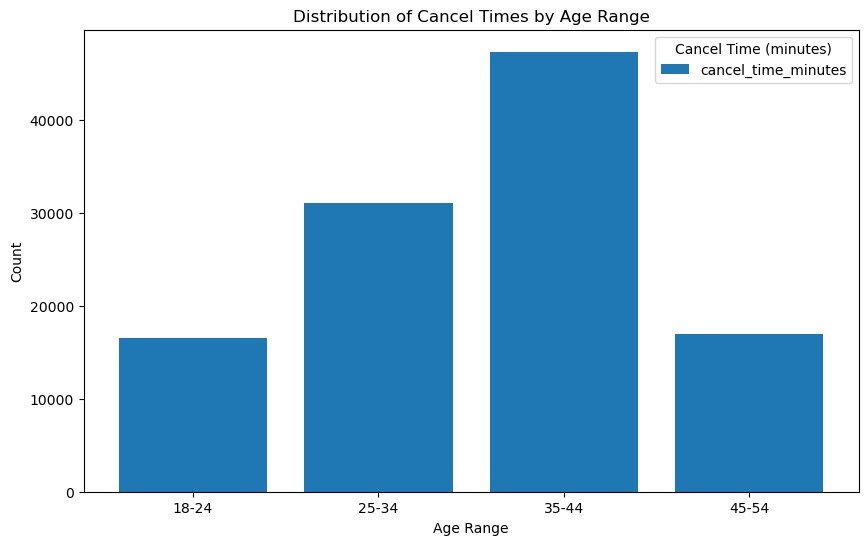

In [27]:
filtered_df = df.dropna(subset=['request_ts', 'cancel_ts'])

# Create a pivot table to calculate the counts for each age range and cancel time
grouped_data = pd.pivot_table(filtered_df, values='cancel_time_minutes', index='age_range', columns=None, aggfunc='count')

# Reorder the columns by cancel time in ascending order
grouped_data = grouped_data.reindex(sorted(grouped_data.columns), axis=1)
grouped_data.describe()
color_map = plt.get_cmap('tab10')

plt.figure(figsize=(10, 6))

# Loop through the columns of grouped_data
for i, col in enumerate(grouped_data.columns):
    # Get the cancel time counts for the current cancel time value
    cancel_time_counts = grouped_data[col].dropna()
    
    # Plot the stacked bar chart for the current cancel time value
    plt.bar(cancel_time_counts.index, cancel_time_counts.values, label=col, color=color_map(i))

plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Distribution of Cancel Times by Age Range')
plt.legend(title='Cancel Time (minutes)')

plt.show()

In [29]:
pip install pyperclip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=5a946cb4717c8daa371db1592e60113ea06ac75133eb42d7b9798058acfd8e42
  Stored in directory: c:\users\ashka\appdata\local\pip\cache\wheels\0c\09\9e\49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built pyperclip
Note: you may need to restart the kernel to use updated packages.


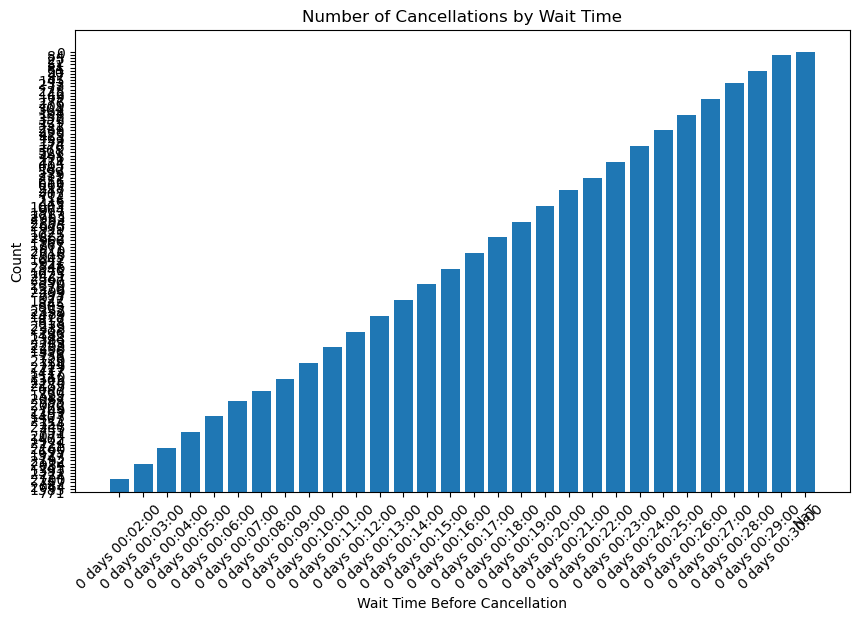

In [32]:
import json
import pyperclip

# Read JSON data from clipboard
json_data = pyperclip.paste()

# Parse JSON into DataFrame
df_1 = pd.DataFrame(json.loads(json_data))

# Convert columns to appropriate types
df_1['wait_be4_cancel'] = pd.to_timedelta(df_1['wait_be4_cancel'])
df_1['count'] = df_1['count'].astype(int)

# Sort the DataFrame by 'wait_be4_cancel'
df_1_sorted = df_1.sort_values(by='wait_be4_cancel').astype(str)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(df_1_sorted['wait_be4_cancel'], df_1_sorted['count'])

# Set the x-axis label and rotate the tick labels if needed
plt.xlabel('Wait Time Before Cancellation')
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Count')

# Set the chart title
plt.title('Number of Cancellations by Wait Time')

# Show the plot
plt.show()


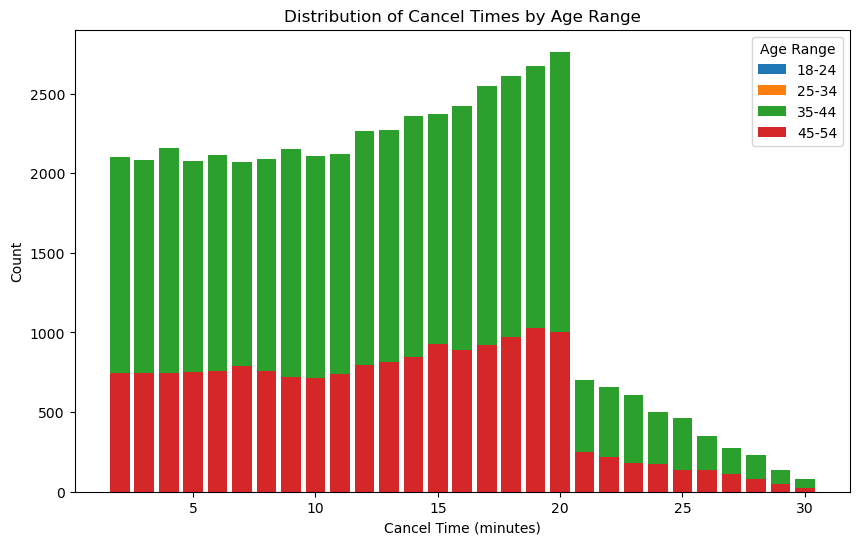

In [23]:
df['cancel_time_minutes'] = (df['cancel_ts'] - df['request_ts']).dt.total_seconds() / 60
filtered_df = df.dropna(subset=['request_ts', 'cancel_ts'])
grouped_data = filtered_df.groupby(['age_range', 'cancel_time_minutes']).size().unstack()

# Define the color map
color_map = plt.get_cmap('tab10')

plt.figure(figsize=(10, 6))

# Loop through the unique age ranges
for i, age_range in enumerate(grouped_data.index):
    # Get the cancel time counts for the current age range
    cancel_time_counts = grouped_data.loc[age_range].dropna()
    
    # Plot the stacked bar chart for the current age range
    plt.bar(cancel_time_counts.index, cancel_time_counts.values, label=age_range, color=color_map(i))

plt.xlabel('Cancel Time (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Cancel Times by Age Range')
plt.legend(title='Age Range')

plt.show()


In [9]:
average_wait_time = df['accept_ts'] - df['request_ts']
average_wait_time.describe()

count                       248379
mean     0 days 00:06:53.425048011
std      0 days 00:03:46.468502758
min                0 days 00:02:00
25%                0 days 00:04:00
50%                0 days 00:06:00
75%                0 days 00:09:00
max                0 days 00:20:00
dtype: object

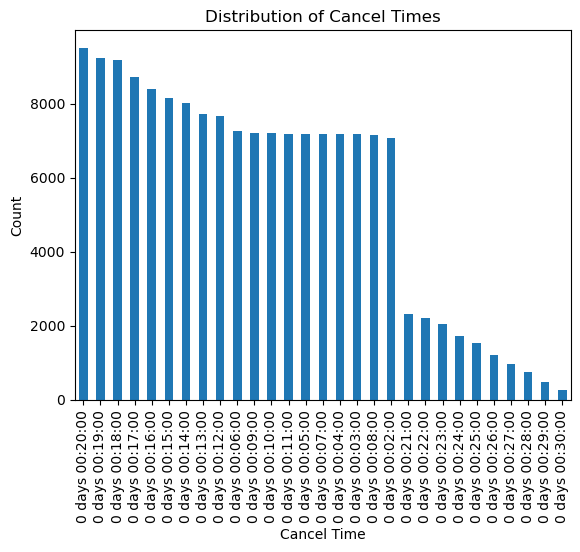

In [11]:
average_cancel_time = df.cancel_ts - df.request_ts
average_cancel_time.describe()

cancel_time_counts = average_cancel_time.value_counts()

cancel_time_counts.plot(kind='bar')
plt.xlabel('Cancel Time')
plt.ylabel('Count')
plt.title('Distribution of Cancel Times')
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame containing the "age_range" and "cancel_time" columns
# Assuming `cancel_time_counts` is already defined
cancel_time_minutes = average_cancel_time.dt.total_seconds() // 60

# Get unique age ranges
age_ranges = df['age_range'].unique()

# Define the color map
color_map = plt.get_cmap('tab10')

plt.figure(figsize=(10, 6))

# Loop through the unique age ranges
for i, age_range in enumerate(age_ranges):
    # Filter the DataFrame for the current age range
    filtered_df = df[df['age_range'] == age_range]
    
    # Get the cancel time counts for the filtered DataFrame
    cancel_time_counts = filtered_df['cancel_time_minutes'].value_counts().sort_index()
    
    # Plot the stacked bar chart for the current age range
    plt.bar(cancel_time_counts.index, cancel_time_counts.values, label=age_range, color=color_map(i))

plt.xlabel('Cancel Time (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Cancel Times')
plt.legend(title='Age Range')

plt.show()


KeyError: 'cancel_time_minutes'

<Figure size 1000x600 with 0 Axes>

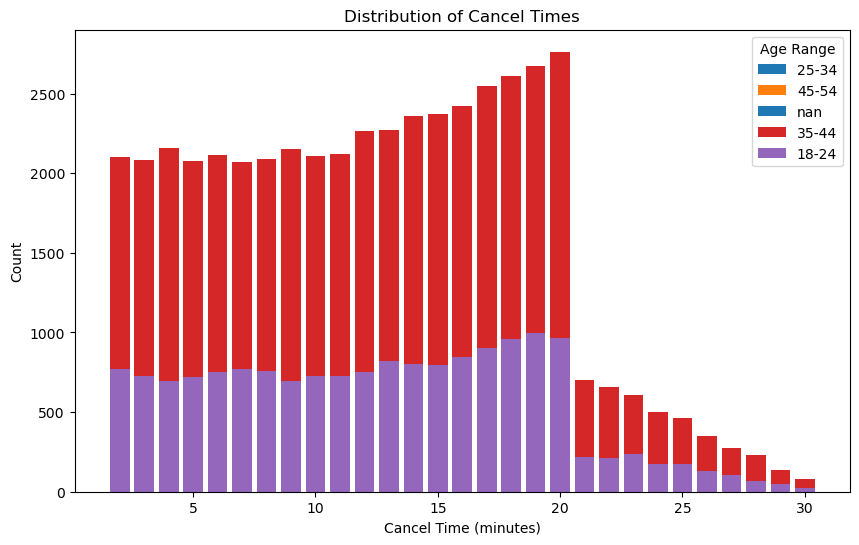

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame containing the "age_range" column
# Assuming `cancel_time_minutes` is already defined as a Series

# Get unique age ranges
age_ranges = df['age_range'].unique()

# Define the color map
color_map = plt.get_cmap('tab10')

plt.figure(figsize=(10, 6))

# Loop through the unique age ranges
for i, age_range in enumerate(age_ranges):
    # Filter the DataFrame for the current age range
    filtered_df = df[df['age_range'] == age_range]
    
    # Get the cancel time counts for the filtered DataFrame
    cancel_time_counts = cancel_time_minutes.loc[filtered_df.index].value_counts().sort_index()
    
    # Plot the stacked bar chart for the current age range
    plt.bar(cancel_time_counts.index, cancel_time_counts.values, label=age_range, color=color_map(i))

plt.xlabel('Cancel Time (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Cancel Times')
plt.legend(title='Age Range')

plt.show()


<Figure size 1000x600 with 0 Axes>

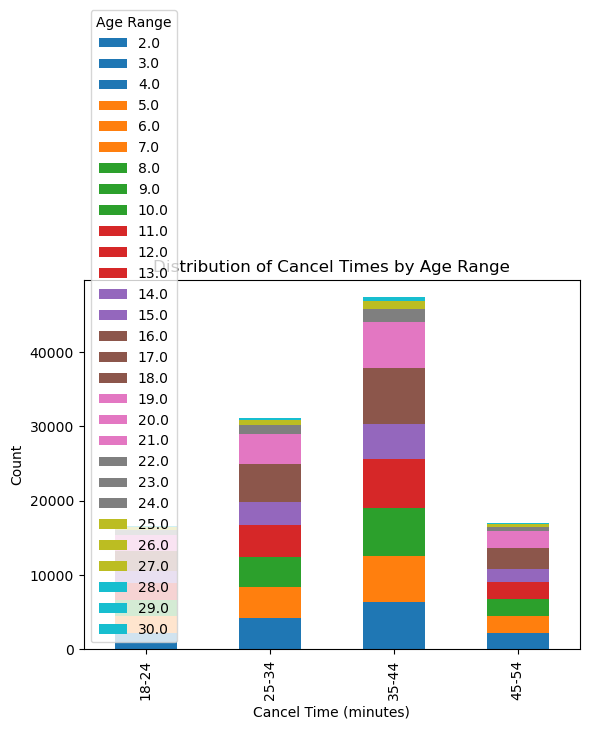

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame containing the "age_range" and "cancel_time" columns
# Assuming `cancel_time_minutes` is already defined

# Group the data by age range and cancel time minutes, and calculate the counts
grouped_data = df.groupby(['age_range', cancel_time_minutes]).size().unstack()

# Define the color map
color_map = plt.get_cmap('tab10')

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, colormap=color_map)

plt.xlabel('Cancel Time (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Cancel Times by Age Range')
plt.legend(title='Age Range')

plt.show()

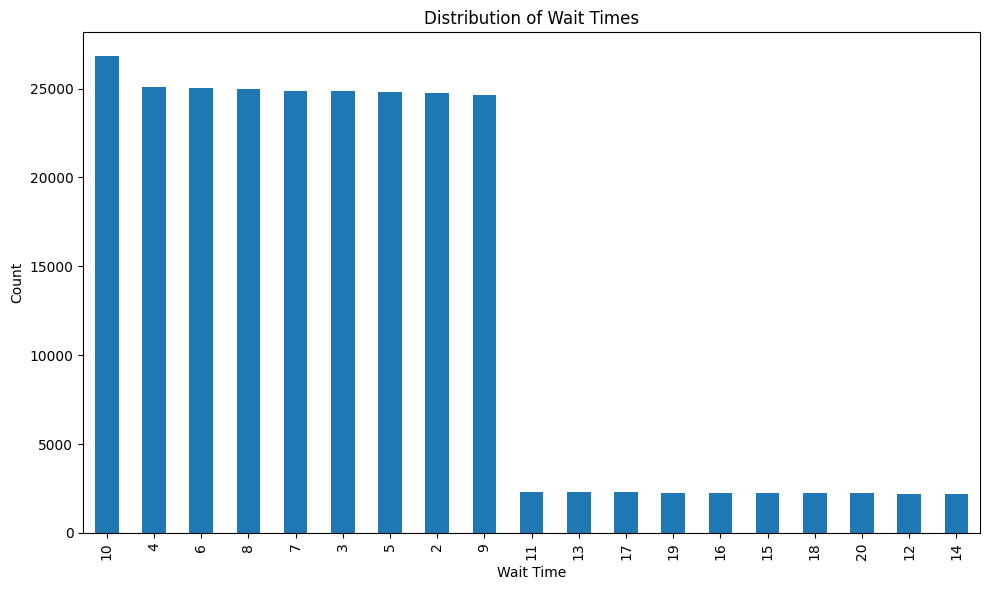

In [24]:
wait_time_counts = average_wait_time.value_counts()
wait_time_minutes = [int(td.total_seconds() // 60) for td in wait_time_counts.index]

plt.figure(figsize=(10, 6))
wait_time_counts.plot(kind='bar')
plt.xlabel('Wait Time')
plt.ylabel('Count')
plt.title('Distribution of Wait Times')
plt.xticks(range(len(wait_time_minutes)), wait_time_minutes)  # Setting x-axis labels to minutes
plt.tight_layout()
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396679 entries, 0 to 396678
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   app_download_key     396679 non-null  object        
 1   platform             396679 non-null  object        
 2   download_ts          396679 non-null  datetime64[ns]
 3   session_id           390694 non-null  object        
 4   user_id              390694 non-null  float64       
 5   age_range            273395 non-null  object        
 6   signup_ts            390694 non-null  datetime64[ns]
 7   ride_id              385477 non-null  float64       
 8   driver_id            248379 non-null  float64       
 9   request_ts           385477 non-null  datetime64[ns]
 10  accept_ts            248379 non-null  datetime64[ns]
 11  pickup_location      385477 non-null  object        
 12  dropoff_location     385477 non-null  object        
 13  pickup_ts     

In [14]:
df['age_range'].unique()

array(['25-34', '45-54', nan, '35-44', '18-24'], dtype=object)

In [15]:
df['age_range'].value_counts()

age_range
35-44    115728
25-34     76258
18-24     41185
45-54     40224
Name: count, dtype: int64

In [16]:
df['age_range'].isna().sum()

123284

In [17]:
df['age_range'].value_counts(dropna=False)

age_range
NaN      123284
35-44    115728
25-34     76258
18-24     41185
45-54     40224
Name: count, dtype: int64

In [29]:
nan_count = df['age_range'].isna().sum()  # Count of NaN values

age_group_counts = df['age_range'].value_counts(dropna=True)  # Count of each age group, excluding NaN

nan_distributed = age_group_counts * nan_count / age_group_counts.sum()

df.loc[df['age_range'].isna(), 'age_range'] = nan_distributed


In [30]:
df.age_range.value_counts()

age_range
35-44    115728
25-34     76258
18-24     41185
45-54     40224
Name: count, dtype: int64

In [11]:
download_counts = df.groupby('platform')['app_download_key'].nunique()
print(download_counts)

platform
android     6935
ios        14290
web         2383
Name: app_download_key, dtype: int64


In [12]:
signup_count = df.groupby('platform')['session_id'].nunique()
print(signup_count)

platform
android     5148
ios        10728
web         1747
Name: session_id, dtype: int64


In [13]:
ride_request_count = df['request_ts'].notnull().sum()
print(ride_request_count)

385477


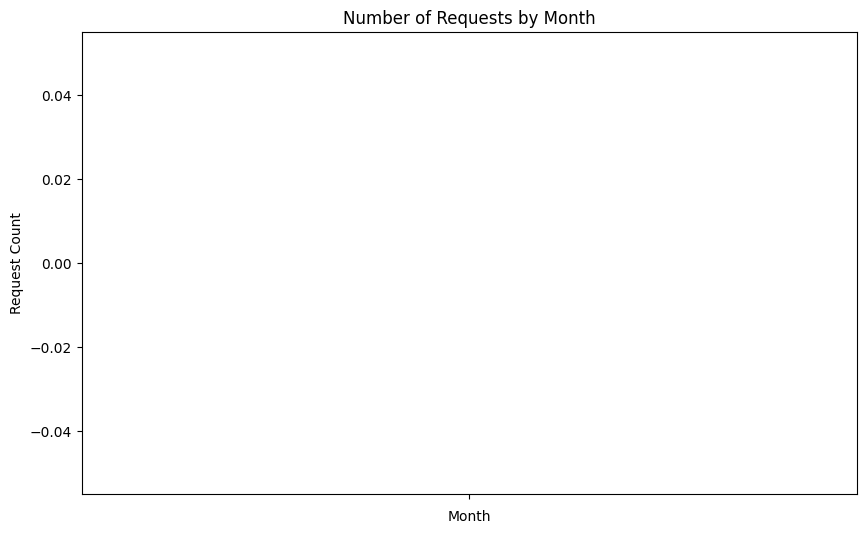

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Assuming "request_ts" is a datetime column in your dataframe

# Drop rows with non-finite values in "request_ts" column
df = df.dropna(subset=['request_ts'])

# Convert "request_ts" to a datetime type if it's not already
df['request_ts'] = pd.to_datetime(df['request_ts'])

# Extract the minimum and maximum dates from the "request_ts" column
start_date = df['request_ts'].min().strftime('%Y-%m')
end_date = df['request_ts'].max().strftime('%Y-%m')

# Create a complete set of months based on the extracted start and end dates
all_months = pd.date_range(start=start_date, end=end_date, freq='M').strftime('%Y-%m').tolist()

# Extract month and year from the "request_ts" column using .loc indexing
df.loc[:, 'month'] = df['request_ts'].dt.month.astype(int)
df.loc[:, 'year'] = df['request_ts'].dt.year

# Group by month and year, and count the number of requests in each group
request_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

# Reindex the request_counts dataframe with all_months
request_counts = request_counts.reindex(pd.MultiIndex.from_product([request_counts['year'].unique(), request_counts['month'].unique()], names=['year', 'month']), fill_value=0)

# Create a column to hold the month names
request_counts['month_name'] = request_counts['month'].apply(lambda x: calendar.month_name[x])

# Plot the request counts using a categorical plot
plt.figure(figsize=(10, 6))
sns.barplot(x='month_name', y='count', data=request_counts)
plt.xlabel('Month')
plt.ylabel('Request Count')
plt.title('Number of Requests by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<Figure size 1000x600 with 0 Axes>

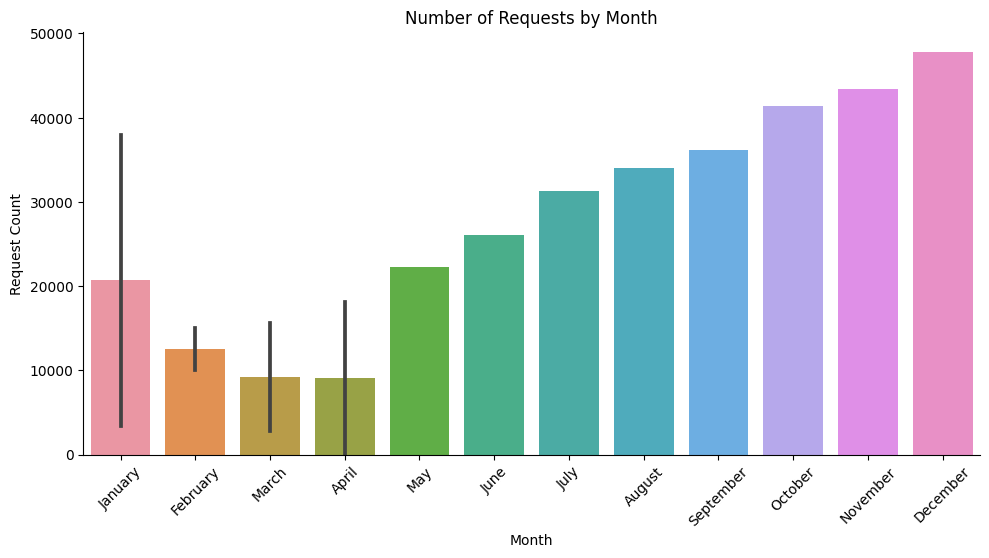

In [15]:
# Drop rows with non-finite values in "request_ts" column
df = df.dropna(subset=['request_ts'])

# Convert "request_ts" to a datetime type if it's not already
df['request_ts'] = pd.to_datetime(df['request_ts'])

# Extract month and year from the "request_ts" column using .loc indexing
df.loc[:, 'month'] = df['request_ts'].dt.month.astype(int)
df.loc[:, 'year'] = df['request_ts'].dt.year

# Group by month and year, and count the number of requests in each group
request_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

# Create a column to hold the month names
request_counts['month_name'] = request_counts['month'].apply(lambda x: calendar.month_name[x])

# Plot the request counts using a categorical plot
plt.figure(figsize=(10, 6))
sns.catplot(x='month_name', y='count', data=request_counts, kind='bar', aspect=2)
plt.xlabel('Month')
plt.ylabel('Request Count')
plt.title('Number of Requests by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
metrocar['transaction_ts'].info()

In [ ]:
metrocar['purchase_amount_usd'].describe()

In [ ]:
df.info()

In [ ]:
final_df = pd.concat([download_counts, signup_counts, request_counts, accept_counts,
                      complete_counts, payment_counts, review_counts])

final_df = final_df.reset_index()
final_df

In [ ]:
final_df['fair'].sum()

In [ ]:
download_df

In [ ]:
download_df['app_download_key'].value_counts()

In [ ]:
download_df.info()